In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath(".."))

import matplotlib.pyplot as plt
import numpy as np

from label_utils.label_registration import labelmaps_registration
from volume_utils.radial2SA import volume_to_SA
import nibabel as nib

In [2]:
path_fixed_seg = 'D:/Toolbox/data/pat0_orig_seg.nii.gz'
path_fixed_im = 'D:/Toolbox/data/pat0_orig.nii.gz'
path_moving_seg = 'D:/Toolbox/data/pat50_orig_seg.nii.gz'
path_moving_im = 'D:/Toolbox/data/pat50_orig.nii.gz'
path_output = 'D:/Toolbox/data'

mov = nib.load(path_moving_seg).get_fdata()
fix = nib.load(path_fixed_seg).get_fdata()

### 1st step: Patient 50, a Single Ventricle patient is regestered on Patient 0

In [3]:
labelmaps_registration(path_fixed_seg,path_moving_seg, path_output,path_moving_im,filename='pat_50_registered')

In [4]:
registered_seg_path =os.path.join(path_output, 'pat_50_registered_seg.nii.gz')
registered_im_path =os.path.join(path_output, 'pat_50_registered_im.nii.gz')

registered_seg = nib.load(registered_seg_path).get_fdata()
registered_im = nib.load(registered_im_path).get_fdata()

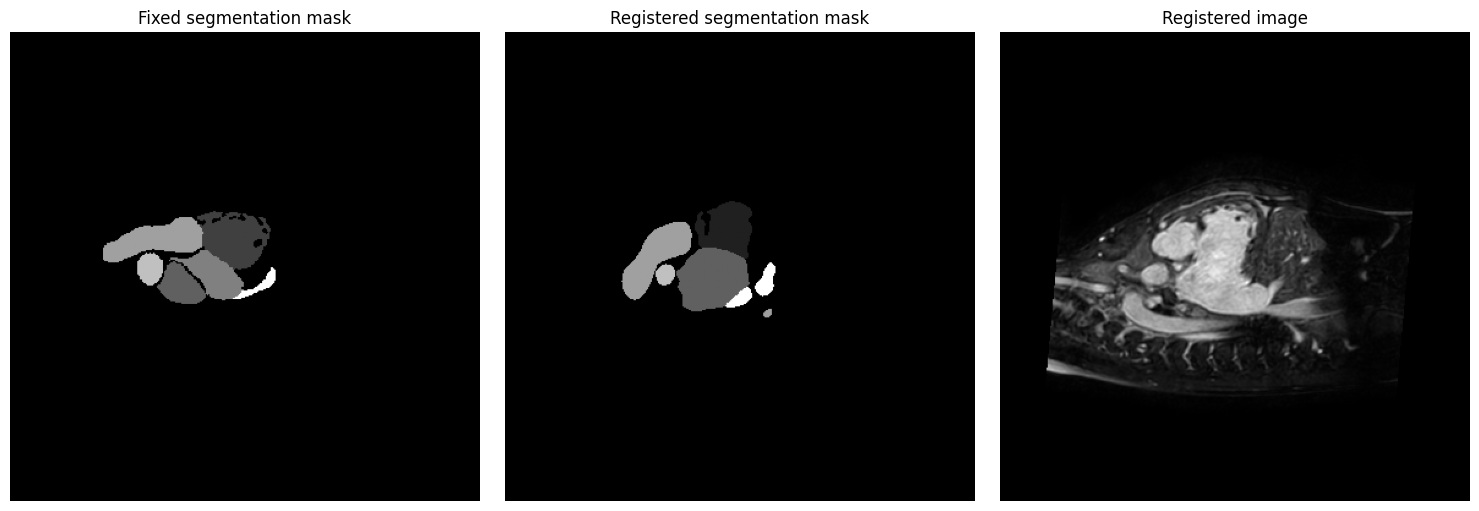

In [5]:
fig, axs = plt.subplfig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(fix[:, :, 90], cmap="gray")
axs[1].imshow(registered_seg[:, :, 90], cmap="gray")
axs[2].imshow(registered_im[:, :, 70], cmap="gray")

axs[0].set_title("Fixed segmentation mask")
axs[1].set_title("Registered segmentation mask")
axs[2].set_title("Registered image")
for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()

### Both Patient 0 and Patient 50 are rotated to the SA view

In [6]:
volume_to_SA(registered_seg_path, path_output,output_filename='SA_registered_pat50')
volume_to_SA(path_fixed_seg, path_output, output_filename='SA_pat0')

d:\Toolbox\volume_utils\radial2SA.py:117: UserWarning:

Optimal rotation is not uniquely or poorly defined for the given sets of vectors.



Saved: D:/Toolbox/data
Saved: D:/Toolbox/data


In [8]:
sa_pat50_registered_path =os.path.join(path_output,'SA_registered_pat50_seg.nii.gz')
sa_pat0_path =os.path.join(path_output,'SA_pat0_seg.nii.gz')

sa_pat50_registered=nib.load(sa_pat50_registered_path).get_fdata()
sa_pat0=nib.load(sa_pat0_path).get_fdata()

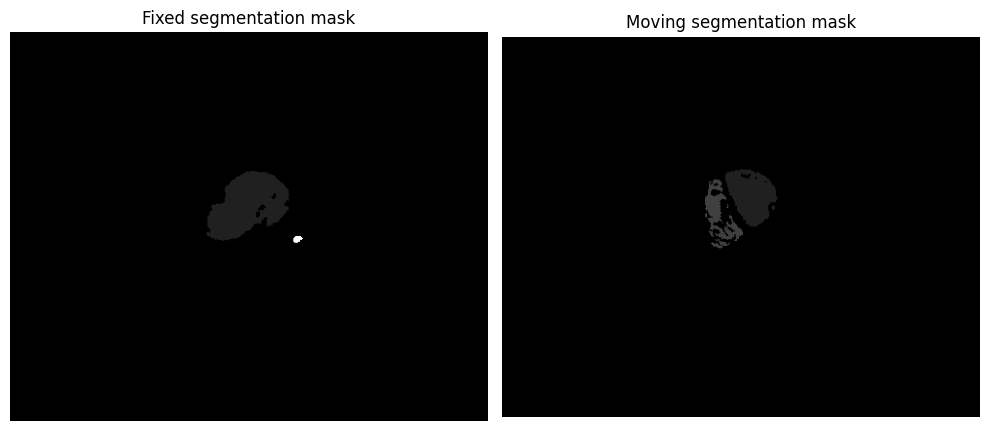

In [ ]:
fig, axs = plt.subplfig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(sa_pat50_registered[:, :, 270], cmap="gray",vmin=0,vmax=8)
axs[1].imshow(sa_pat0[:, :, 270], cmap="gray",vmin=0,vmax=8)
axs[0].set_title("SA view patient 50")
axs[1].set_title("SA view patient 0")

for ax in axs:
    ax.axis("off")
plt.tight_layout()
plt.show()